# 패키지 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [3]:
# ----------------------------------------
# 데이터를 불러와 데이터프레임을 만들고
# 상위 5개 행을 확인합니다.
# ----------------------------------------
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 단순선형회귀
* TV광고량에 따른 판매량 예측

## 독립변수, 종속변수 선택
* 독립변수는 2차원으로 다룹니다.

In [9]:
X = df[['TV']] # 독립변수는 2차원이어서 대문자 X 로 표기하심
y = df['Sales']

## 훈련세트, 테스트세트 분할
* 모듈 : `model_selection`
* 함수 : `train_test_split`

In [33]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


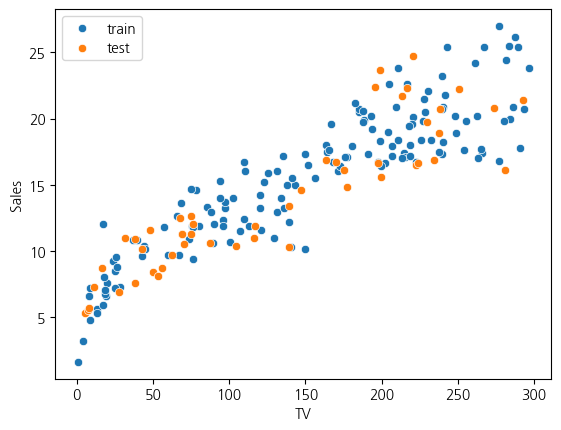

In [12]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할 확인 시각화
# ------------------------------------------

sns.scatterplot(x=X_train['TV'], y=y_train, label='train')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test')
plt.legend()
pass

## 모델 생성 및 훈련
* 선형회귀 모델
    * 모듈 : `linear_model`
    * 클래스 : `LinearRegression`

In [16]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------

from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------

model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 테스트세트로 평가


In [19]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------

y_pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print(f'mse : {mse:.4f}')
print(f'mae : {mae:.4f}')
print(f'rmse : {rmse:.4f}')
print(f'r2 score : {r2score:.4f}')

mse : 5.5134
mae : 1.8651
rmse : 2.3481
r2 score : 0.7972


In [29]:
# ------------------------------------------
# 실제값과 모델의 예측값 비교
# ------------------------------------------

df = pd.DataFrame()
df['X_test'] = X_test['TV']
df['y_test'] = y_test
df['y_pred'] = y_pred
df['diff'] = df['y_test'] - df['y_pred']
df

,X_test,y_test,y_pred,diff
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [31]:
# ------------------------------------------
# 회귀모델의 평가점수 수동 계산
# ------------------------------------------

mse = np.square(df['diff']).mean()
mae = abs(df['diff']).mean()
rmse = np.sqrt(mse)
print(mse, mae, rmse)

5.513351187165511 1.8651146911099161 2.3480526372220685


## 모델의 학습 결과

In [34]:
# -----------------------------------------
# 회귀계수, 절편, 회귀식
# -----------------------------------------

w = model.coef_
b = model.intercept_

print(f'y = {w[0]} * TV + {b}')

y = 0.05538653085519158 * TV + 7.098853680118275


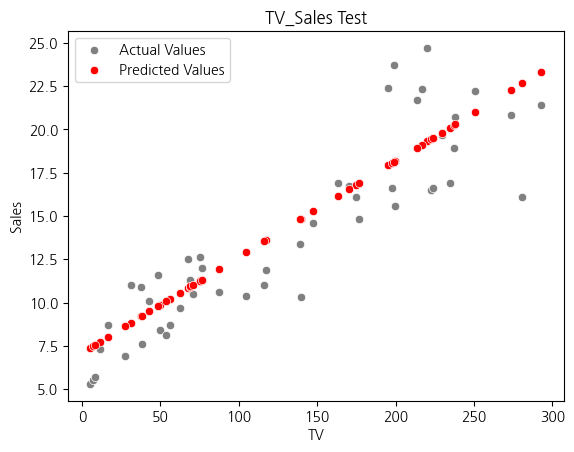

In [35]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------

sns.scatterplot(x=X_test['TV'], y=y_test, color='gray', label='Actual Values')  # 테스트데이터 실제값
sns.scatterplot(x=X_test['TV'], y=y_pred, color='red', label='Predicted Values')  # 테스트데이터 예측값
plt.xlabel('TV')
plt.title('TV_Sales Test')
pass


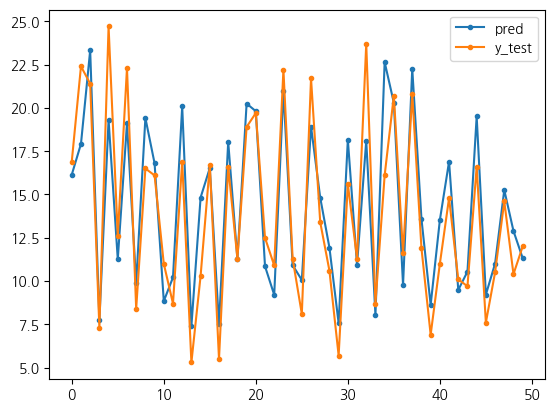

In [36]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------

plt.plot(y_pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test')
plt.legend()
pass